In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/inpatient-hospital-charges/inpatientCharges.csv


In [2]:
df = pd.read_csv("/kaggle/input/inpatient-hospital-charges/inpatientCharges.csv")

In [3]:
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder(handle_unknown='ignore') #
df1 = df[['Provider Name']]
df1 = df1.drop_duplicates()
enc.fit(df1)

OneHotEncoder(handle_unknown='ignore')

In [4]:
df2 = pd.DataFrame(enc.transform(df[['Provider Name']]).toarray())
df3 = enc.get_feature_names_out(['Provider Name'])
df2.columns=df3
df2[["Provider Name_SOUTHEAST ALABAMA MEDICAL CENTER"]]

,Provider Name_SOUTHEAST ALABAMA MEDICAL CENTER
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
163060,0.0
163061,0.0
163062,0.0
163063,0.0


In [5]:
df6 = df[['Provider Name']]
df6.loc[df6['Provider Name'].str.contains("MEDICAL CENTER"),'Provider Type']='Medical Center'
df6.loc[df6['Provider Name'].str.contains("MED CENTER"),'Provider Type']='Medical Center'
df6.loc[df6['Provider Name'].str.contains("MEDICAL CTR"),'Provider Type']='Medical Center'
df6.loc[df6['Provider Name'].str.contains("MED CTR"),'Provider Type']='Medical Center'
df6.loc[df6['Provider Name'].str.contains("HEALTH CENTER"),'Provider Type']='Medical Center'
df6.loc[df6['Provider Name'].str.contains("HOSPITAL"),'Provider Type']='Hospital'
df6.loc[df6['Provider Name'].str.contains("HSPTL"),'Provider Type']='Hospital'
df6.loc[df6['Provider Name'].str.contains("INFIRMARY"),'Provider Type']='Hospital'

enc = OneHotEncoder(handle_unknown='ignore') 
df7 = df6[['Provider Type']]
df7 = df7.drop_duplicates()
enc.fit(df7)
df8 = pd.DataFrame(enc.transform(df6[['Provider Type']]).toarray())
df9 = enc.get_feature_names_out(['Provider Type'])
df8.columns=df9

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [6]:
import matplotlib.pyplot as plt

<AxesSubplot:>

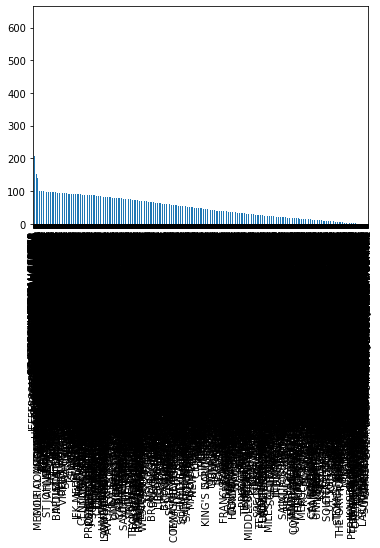

In [7]:
df['Provider Name'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Provider Name'>

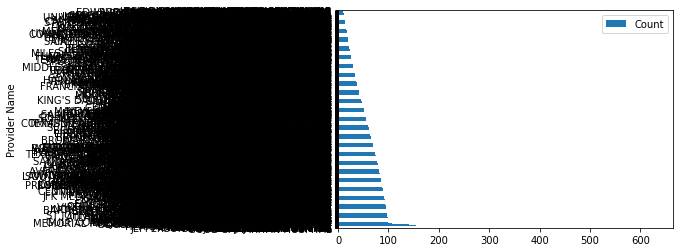

In [8]:
df4 = pd.DataFrame(df[['Provider Name']].value_counts()).reset_index()
df4.columns=['Provider Name','Count']
df5 = df4[df4.Count>=10]
df5 = df5.set_index(['Provider Name'])
df5.plot(kind="barh")

<AxesSubplot:ylabel='Provider Name'>

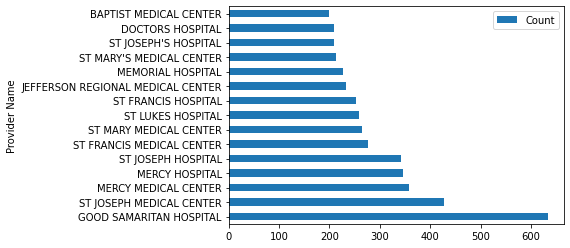

In [9]:
df4 = pd.DataFrame(df[['Provider Name']].value_counts()).reset_index()
df4.columns=['Provider Name','Count']
df5 = df4[df4.Count>=200]
df5 = df5.set_index(['Provider Name'])
df5.plot(kind="barh")

In [10]:
from sklearn.preprocessing import StandardScaler
df10 = pd.DataFrame(df[df.columns[8]])
scaler = StandardScaler()
scaler.fit(df10)
print(scaler.transform(df10))

[[ 0.9436405 ]
 [-0.56309424]
 [-0.36741441]
 ...
 [-0.46525433]
 [-0.6217982 ]
 [-0.60223021]]


In [11]:
df[df.columns[8]]

0         91
1         14
2         24
3         25
4         18
          ..
163060    23
163061    11
163062    19
163063    11
163064    12
Name:  Total Discharges , Length: 163065, dtype: int64